<a href="https://colab.research.google.com/github/Juseong-Yu/CodeitdataScience/blob/main/bukchon_cctv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import pandas as pd
import os
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl

In [86]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [87]:
plt.rc('font', family='NanumBarunGothic')

 
mpl.rcParams['axes.unicode_minus'] = False

In [88]:
key = '67434745776161613130336e6e544368'
file_type = 'json'
service_name = 'BukChonInOutPeopleInfo'

In [89]:
dict_fin = []

for i in range(1,29223,1000):
  start = str(i)
  end = str(i+999)
  url = os.path.join("http://openapi.seoul.go.kr:8088/", key,file_type,service_name,start,end)
  path = os.path.join(url) 
  response = requests.get(path)
  texter = response.text
  dict_data = json.loads(texter)
  dict_data_refine = dict_data['BukChonInOutPeopleInfo']['row']
  dict_fin += dict_data_refine

In [90]:
df = pd.DataFrame(dict_fin)
df

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT
0,2.0,계동길 69,계동교회 앞,2022-11-30 21:10:41,2022-11-30 21:20:41,9386.0,13749.0
1,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:10:41,2022-11-30 21:20:41,7903.0,5279.0
2,2.0,계동길 69,계동교회 앞,2022-11-30 21:20:41,2022-11-30 21:30:41,9398.0,13776.0
3,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:20:41,2022-11-30 21:30:41,7927.0,5312.0
4,2.0,계동길 69,계동교회 앞,2022-11-30 21:30:41,2022-11-30 21:40:41,9414.0,13800.0
...,...,...,...,...,...,...,...
29350,1.0,율곡로3길 50,덕성여고 앞,2023-01-29 22:20:40,2023-01-29 22:30:40,3626.0,5328.0
29351,2.0,계동길 69,계동교회 앞,2023-01-29 22:30:40,2023-01-29 22:40:40,3249.0,4642.0
29352,1.0,율곡로3길 50,덕성여고 앞,2023-01-29 22:30:40,2023-01-29 22:40:40,3641.0,5348.0
29353,2.0,계동길 69,계동교회 앞,2023-01-29 22:40:40,2023-01-29 22:50:40,3258.0,4661.0


In [91]:
df['ENDTIME'] = pd.to_datetime(df['ENDTIME'])
df['MONTH'] = df['ENDTIME'].dt.month
df['HOUR'] = df['ENDTIME'].dt.hour
df

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT,MONTH,HOUR
0,2.0,계동길 69,계동교회 앞,2022-11-30 21:10:41,2022-11-30 21:20:41,9386.0,13749.0,11,21
1,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:10:41,2022-11-30 21:20:41,7903.0,5279.0,11,21
2,2.0,계동길 69,계동교회 앞,2022-11-30 21:20:41,2022-11-30 21:30:41,9398.0,13776.0,11,21
3,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:20:41,2022-11-30 21:30:41,7927.0,5312.0,11,21
4,2.0,계동길 69,계동교회 앞,2022-11-30 21:30:41,2022-11-30 21:40:41,9414.0,13800.0,11,21
...,...,...,...,...,...,...,...,...,...
29350,1.0,율곡로3길 50,덕성여고 앞,2023-01-29 22:20:40,2023-01-29 22:30:40,3626.0,5328.0,1,22
29351,2.0,계동길 69,계동교회 앞,2023-01-29 22:30:40,2023-01-29 22:40:40,3249.0,4642.0,1,22
29352,1.0,율곡로3길 50,덕성여고 앞,2023-01-29 22:30:40,2023-01-29 22:40:40,3641.0,5348.0,1,22
29353,2.0,계동길 69,계동교회 앞,2023-01-29 22:40:40,2023-01-29 22:50:40,3258.0,4661.0,1,22


In [92]:
new_df = df[['DESCRIPTION','INCOUNT','OUTCOUNT','MONTH','HOUR']]
new_df

,DESCRIPTION,INCOUNT,OUTCOUNT,MONTH,HOUR
0,계동교회 앞,9386.0,13749.0,11,21
1,덕성여고 앞,7903.0,5279.0,11,21
2,계동교회 앞,9398.0,13776.0,11,21
3,덕성여고 앞,7927.0,5312.0,11,21
4,계동교회 앞,9414.0,13800.0,11,21
...,...,...,...,...,...
29350,덕성여고 앞,3626.0,5328.0,1,22
29351,계동교회 앞,3249.0,4642.0,1,22
29352,덕성여고 앞,3641.0,5348.0,1,22
29353,계동교회 앞,3258.0,4661.0,1,22


In [93]:
average = df.groupby(['DESCRIPTION'])['OUTCOUNT'].mean()
average_df = pd.DataFrame(average)
average_df

,OUTCOUNT
DESCRIPTION,
계동교회 앞,6086.509401
덕성여고 앞,2086.239070
삼청파출소 사잇길,2293.436760


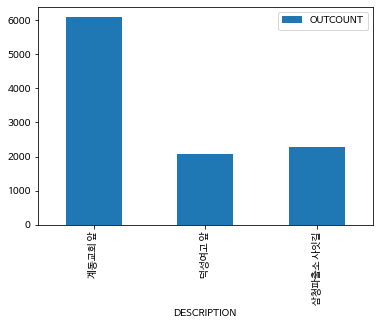

In [94]:
average_df.plot(kind = 'bar')

In [95]:
average2 =df.groupby(['MONTH','DESCRIPTION'])['OUTCOUNT'].mean()
average2_df = pd.DataFrame(average2)
average2_df

OUTCOUNT
MONTH DESCRIPTION              
1     계동교회 앞        3501.734122
      덕성여고 앞        1661.146412
10    계동교회 앞       10582.559441
      삼청파출소 사잇길     2675.354312
11    계동교회 앞       10364.271562
      덕성여고 앞        2758.048387
      삼청파출소 사잇길     2178.781316
12    계동교회 앞        3491.053463
      덕성여고 앞        1975.683973

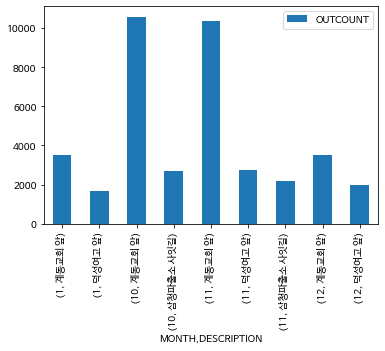

In [96]:
average2_df.plot(kind = 'bar')

In [97]:
average3 =df.groupby(['MONTH'])['OUTCOUNT'].mean()
average3_df = pd.DataFrame(average2)
average3_df

OUTCOUNT
MONTH DESCRIPTION              
1     계동교회 앞        3501.734122
      덕성여고 앞        1661.146412
10    계동교회 앞       10582.559441
      삼청파출소 사잇길     2675.354312
11    계동교회 앞       10364.271562
      덕성여고 앞        2758.048387
      삼청파출소 사잇길     2178.781316
12    계동교회 앞        3491.053463
      덕성여고 앞        1975.683973

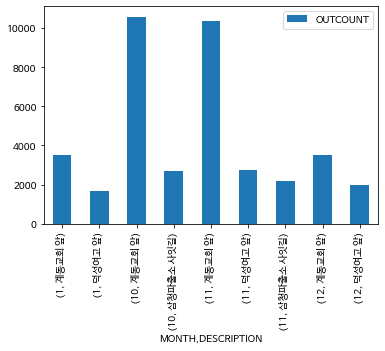

In [98]:
average3_df.plot(kind = 'bar')

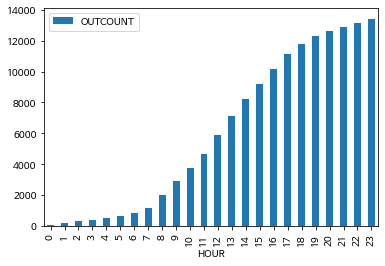

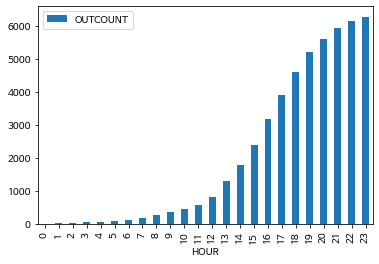

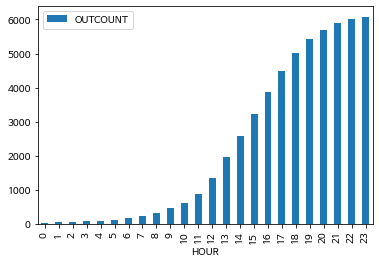

In [99]:
average4 =df.groupby(['DESCRIPTION','HOUR'])['OUTCOUNT'].mean()
average4_df = pd.DataFrame(average4)
average4_df.loc['계동교회 앞'].plot(kind = 'bar')
average4_df.loc['덕성여고 앞'].plot(kind = 'bar')
average4_df.loc['삼청파출소 사잇길'].plot(kind = 'bar')

In [100]:
average4

DESCRIPTION  HOUR
계동교회 앞       0         64.593750
             1        171.477431
             2        290.234375
             3        403.545139
             4        518.296875
                        ...     
삼청파출소 사잇길    19      5416.564103
             20      5684.480769
             21      5888.365385
             22      6015.012821
             23      6076.160256
Name: OUTCOUNT, Length: 72, dtype: float64

In [101]:
for i in range(23,0,-1):
  average4_df.loc['계동교회 앞',i] = average4_df.loc['계동교회 앞',i]-average4_df.loc['계동교회 앞',i-1]
  average4_df.loc['덕성여고 앞',i] = average4_df.loc['덕성여고 앞',i]-average4_df.loc['덕성여고 앞',i-1]
  average4_df.loc['삼청파출소 사잇길',i] = average4_df.loc['삼청파출소 사잇길',i]-average4_df.loc['삼청파출소 사잇길',i-1] 
average4_df

OUTCOUNT
DESCRIPTION HOUR            
계동교회 앞      0      64.593750
            1     106.883681
            2     118.756944
            3     113.310764
            4     114.751736
...                      ...
삼청파출소 사잇길   19    397.717949
            20    267.916667
            21    203.884615
            22    126.647436
            23     61.147436

[72 rows x 1 columns]

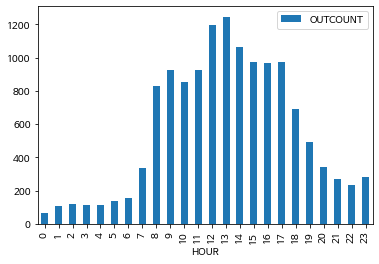

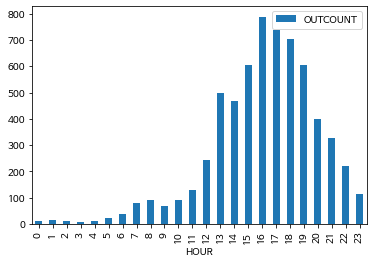

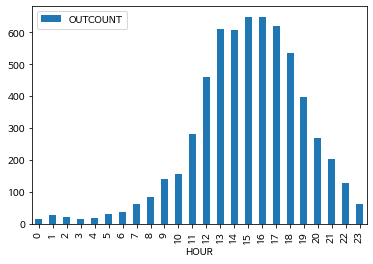

In [102]:
average4_df.loc['계동교회 앞'].plot(kind = 'bar')
average4_df.loc['덕성여고 앞'].plot(kind = 'bar')
average4_df.loc['삼청파출소 사잇길'].plot(kind = 'bar')